<h1 style="text-align:center;text-decoration: underline">Astronomy 350 Midterm Project #2</h1>

Prof. Quimby <br>
Spring 2025 <br>
**Due March 12 at 5pm**

**Student Name** Raynell Labayog

## Background

Quantifying the amount of light coming from distant sources (typically in a given [band pass](https://en.wikipedia.org/wiki/Band-pass_filter)) is one of the most important activities of modern astronomers. Historically such measurements were made by [eye](https://en.wikipedia.org/wiki/Photoreceptor_cell#Humans) and later with [photographic emulsions](https://en.wikipedia.org/wiki/Photographic_film). Today astronomers primarily use [CCD](https://en.wikipedia.org/wiki/Charge-coupled_device) detectors to measure light in the optical band. Since CCDs form the basis for a variety of astronomical measurements, it is important to understand how they operate and how to calibrate CCD data.

## Assignment

Fully process CCD imaging data from the 1.0-m Telescope at Mount Laguna to remove bias and pixel-to-pixel differences and submit this notebook and a formal, written report on your work.

## Resources

- Primer on pp. 396-397 of ["CCD Imager Development for Astronomy"](https://archive.ll.mit.edu/publications/journal/pdf/vol16_no2/16_2_09Burke.pdf) by Burke et al. 2007 (Lincoln Laboratory Journal, vol. 16, num. 2) and the first half of the article (pp. 393-400)

- ["Handbook of CCD Astronomy"](https://ebookcentral.proquest.com/lib/sdsu/detail.action?pq-origsite=primo&docID=255145) by Steve B. Howell, Richard Ellis, and John Huchra

## Process

In [1]:
# modules you may need--MAKE SURE YOU KNOW WHAT EACH OF THESE ARE FOR!
import os
import numpy as np
from astropy.io import fits
from astropy.stats import sigma_clip

#%matplotlib widget
import matplotlib.pyplot as plt

In [2]:
# provided code
def show_image(image, lower=-5, upper=5):
    """
    display the given image using plt.imshow()
    
    `image` is a 2D numpy array

    `lower` and `upper` (float) sepcify the greyscale span in terms of 
    standard deviations below and above the mean, respectively
    """
    vmin = np.median(image) + lower * np.std(image)
    vmax = np.median(image) + upper * np.std(image)
    plt.figure(figsize=(8,8))
    plt.imshow(image, vmin=vmin, vmax=vmax, origin='lower', cmap='gray')
    plt.xticks([])
    plt.yticks([])

## Step1: Set the location (directory path) to the raw data

If you participated in the observing run, you can find the night's data in the [20250223](https://github.com/SDSU-astr350-2025-spring/20250223) repo on GitHub. Otherwise, you can use archived observations in the [20170928](https://github.com/SDSU-astr350-2025-spring/20170928) repo. The contents of these directories are listed in the `log.txt` files. Select a target from the options provided.

**Remember: do not put the data repo in your project repo! Place it in another directory.**

In [4]:
!pwd

/home/jovyan/Midterms/project-02-rlabayog14


In [3]:
# set variables to define the directory holding the raw data

# location of the base directory for your data repos
basedir = '../../Data/' # change this to your actual path!

# subdirectory in your data folder with the data you are using
# (UT date as a simple string in YYYYMMDD format)
rundate = 20250223

In [4]:
# define a global variable with the directory path to the raw images
# (this is a combination of the variables defined above; use them)
DATADIR =  os.path.join(basedir, str(rundate))
print(DATADIR)

../../Data/20250223


## Step 2: Write code to remove overscan from raw images

In [18]:
def remove_overscan(rawimage):
    """
    return the active CCD region (2D numpy array) with the mean overscan value subtracted
    
    `rawimage` is a 2D numpy array
    """

    # number of rows in the active area
    nrows = rawimage.shape[0]
    active_region = rawimage[:, :nrows] 

    # get all pixel values in the overscan region
    overscan = rawimage[:, nrows:]

    # return trimmed image with the mean overscan subtracted
    return active_region - overscan.mean()

In [20]:
# test your code
#Load Bias Image
fname = f'a081.fits'
path = os.path.join(DATADIR, fname)
path

rawimage = fits.getdata(path)
print(len(rawimage))

# remove the overscan from this image
o =remove_overscan(rawimage)

# check the image shape and mean value
print(o.shape, o.mean())


1024
(1024, 1024) 830.4478963048854


## Step 3: Write code to create master bias calibration image

In [21]:
paths = []
for i in range (84, 109):
    fname = f'a{i:03d}.fits'
    path = os.path.join(DATADIR, fname) 
    paths.append(path)
print(paths)

# load a bias image
images = []
for path in paths:
    # load the image data
    rawimage = fits.getdata(path).astype(np.float64)

    # remove the overscan
    image = remove_overscan(rawimage)

    # add to the list
    images.append(image)
  
# convert images list into a 3D array
datacube = np.stack(images)
print(datacube.shape)

# create master bias image
bias = np.mean(datacube, axis=0)

print(bias.shape)
print(np.min(bias), np.max(bias), np.median(bias), np.mean(bias), np.std(bias))

# Step 4: Detect bad columns
column_means = np.mean(bias, axis=0)
std_dev = np.std(column_means)
mean_val = np.mean(column_means)

# Identify columns that deviate significantly from the mean
threshold = 10  # Adjust threshold if necessary
bad_columns = np.where(column_means > threshold)[0]

print("Bad Columns Detected:", bad_columns)

# Step 5: Replace bad columns with interpolated values
bias_clean = np.copy(bias)

for col in bad_columns:
        bias_clean[:, col] = (bias[:, col - 2] + bias[:, col + 2]) / 2


['../../Data/20250223/a084.fits', '../../Data/20250223/a085.fits', '../../Data/20250223/a086.fits', '../../Data/20250223/a087.fits', '../../Data/20250223/a088.fits', '../../Data/20250223/a089.fits', '../../Data/20250223/a090.fits', '../../Data/20250223/a091.fits', '../../Data/20250223/a092.fits', '../../Data/20250223/a093.fits', '../../Data/20250223/a094.fits', '../../Data/20250223/a095.fits', '../../Data/20250223/a096.fits', '../../Data/20250223/a097.fits', '../../Data/20250223/a098.fits', '../../Data/20250223/a099.fits', '../../Data/20250223/a100.fits', '../../Data/20250223/a101.fits', '../../Data/20250223/a102.fits', '../../Data/20250223/a103.fits', '../../Data/20250223/a104.fits', '../../Data/20250223/a105.fits', '../../Data/20250223/a106.fits', '../../Data/20250223/a107.fits', '../../Data/20250223/a108.fits']
(25, 1024, 1024)
(1024, 1024)
-11.129838610197371 87.3101613898026 -0.009838610197371055 -0.02548657467491012 0.9785971455422163
Bad Columns Detected: [815 816]


-0.059284773374861335
-0.02548657467491012


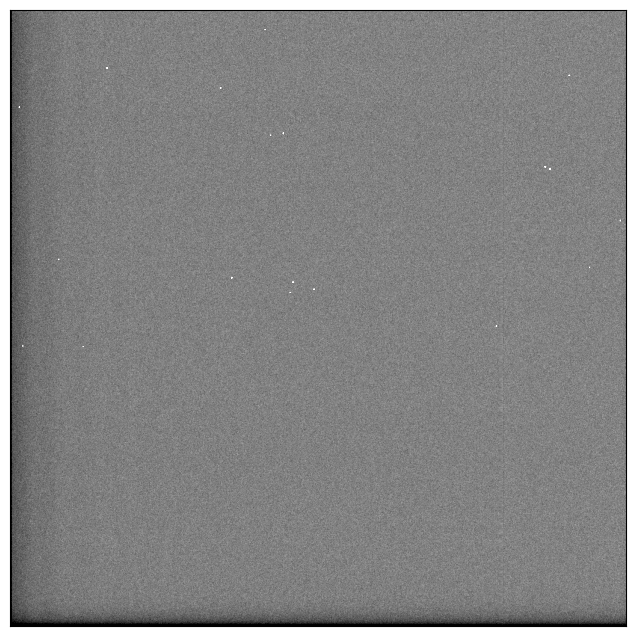

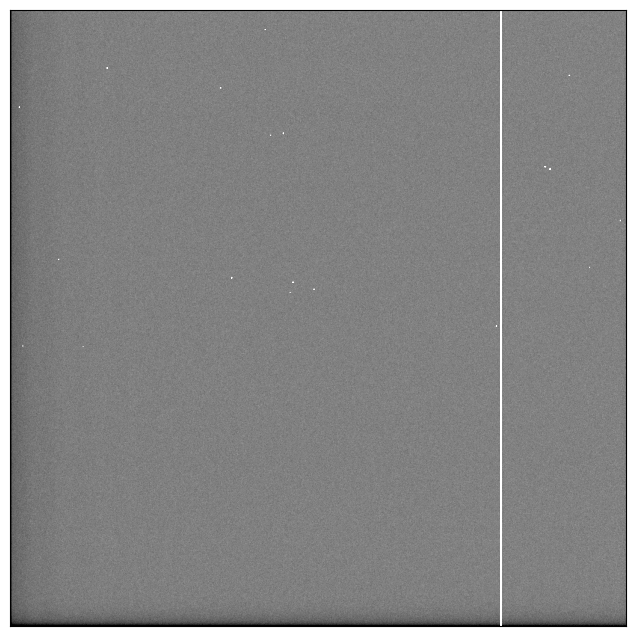

In [23]:
# call the show_image function (defined above) to display the master bias
show_image(bias_clean)
show_image(bias)
print(np.mean(bias_clean))
print(np.mean(bias))

## Step 4: Write code to create master flat field calibration image

Creation of the master flat field image is very similar to creation of the master bias image **except** there are two additional processing steps: 1) you need to subtract the master bias from each individual flat image, and 2) you should scale each image so that the median count level is about 1.0. Unlike the master bias, which applies to all images, you need to create a different master flat field image for each band (i.e. you need three total master flat field images for the B, V, and R bands).

Since you need to do the same thing 3 times, write a function to do this and then call it once for each band.

In [24]:
# create master flat field images

def create_master_flat(fname, bias):
    
    data1 = fits.getdata(fname)
    data = remove_overscan(data1)
    
    flat_corrected = data - bias
    
    med_val = np.median(flat_corrected)
    
    master_flat = flat_corrected / med_val

    return master_flat

paths_b = []
paths_r = []
paths_v = []
for i in range (8, 13):
    fname = f'a{i:03d}.fits'
    path = os.path.join(DATADIR, fname) 
    paths_b.append(path)
print(paths_b)

for i in range (13, 17):
    fname = f'a{i:03d}.fits'
    path = os.path.join(DATADIR, fname) 
    paths_v.append(path)
print(paths_v)

for i in range (17, 23):
    fname = f'a{i:03d}.fits'
    path = os.path.join(DATADIR, fname) 
    paths_r.append(path)
print(paths_r)


# List to store processed master flat images
master_b = []
master_r = []
master_v = []

for path in paths_b:   
    master_flat_image = create_master_flat(path, bias_clean)
    master_b.append(master_flat_image)  

processed_master_b = np.stack(master_b)
processed_b = np.median(processed_master_b, axis=0)

for path in paths_v:    
    # Apply create_master_flat individually for each image
    master_flat_imagev = create_master_flat(path, bias_clean)
    master_v.append(master_flat_imagev) 

# Convert processed master flats list into a 3D array
processed_master_v = np.stack(master_v)
processed_v = np.median(processed_master_v, axis=0)

for path in paths_r: 
    master_flat_imager = create_master_flat(path, bias_clean)
    master_r.append(master_flat_imager)  # Store processed image


processed_master_r = np.stack(master_r)
processed_r = np.median(processed_master_r, axis=0)

print(processed_r.shape)
print(processed_v.shape)

for i in range (8, 13):
    fname = f'a{i:03d}.fits'
    path = os.path.join(DATADIR, fname) 
    paths_b.append(path)
print(paths_b)

r = os.path.join(DATADIR, 'a081.fits') 
v = os.path.join(DATADIR, 'a082.fits') 
b = os.path.join(DATADIR, 'a083.fits') 

['../../Data/20250223/a008.fits', '../../Data/20250223/a009.fits', '../../Data/20250223/a010.fits', '../../Data/20250223/a011.fits', '../../Data/20250223/a012.fits']
['../../Data/20250223/a013.fits', '../../Data/20250223/a014.fits', '../../Data/20250223/a015.fits', '../../Data/20250223/a016.fits']
['../../Data/20250223/a017.fits', '../../Data/20250223/a018.fits', '../../Data/20250223/a019.fits', '../../Data/20250223/a020.fits', '../../Data/20250223/a021.fits', '../../Data/20250223/a022.fits']
(1024, 1024)
(1024, 1024)
['../../Data/20250223/a008.fits', '../../Data/20250223/a009.fits', '../../Data/20250223/a010.fits', '../../Data/20250223/a011.fits', '../../Data/20250223/a012.fits', '../../Data/20250223/a008.fits', '../../Data/20250223/a009.fits', '../../Data/20250223/a010.fits', '../../Data/20250223/a011.fits', '../../Data/20250223/a012.fits']


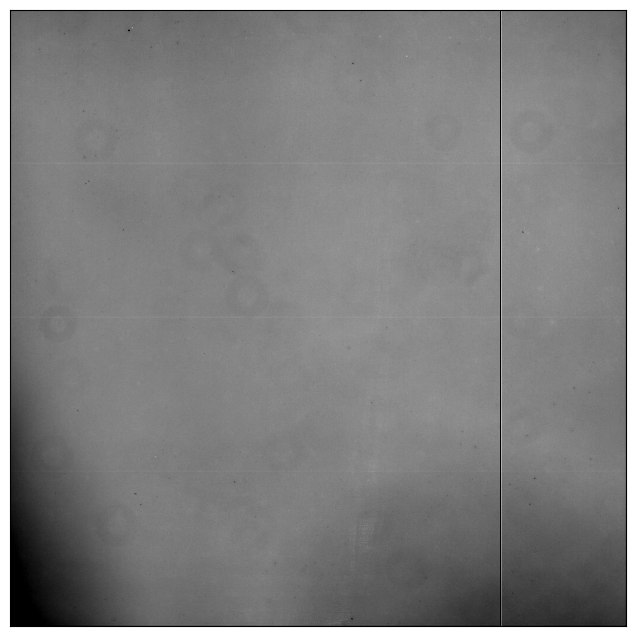

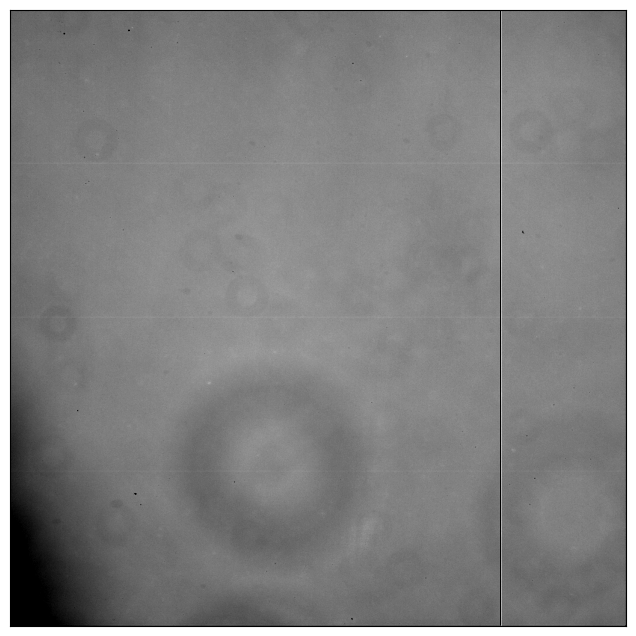

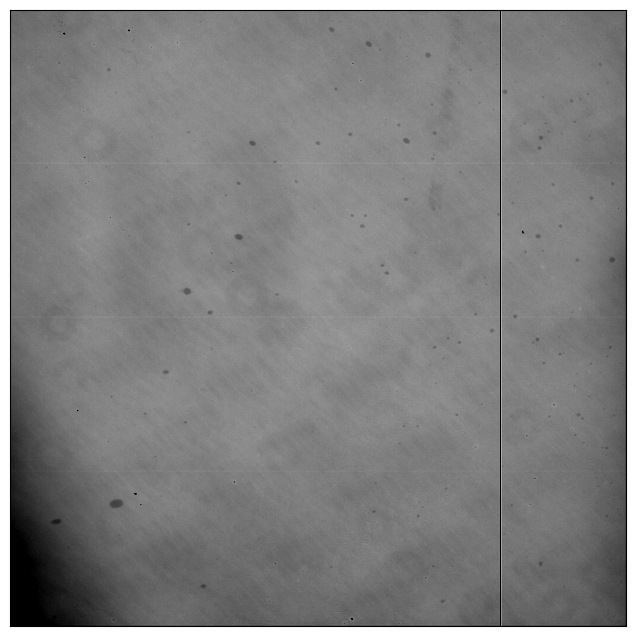

In [25]:
# display each flat image
show_image(processed_r)
show_image(processed_v)
show_image(processed_b)

## Step 5: Write code to fully process target images

In [26]:

def get_proc_image(bias, flat, path):
    """
    Returns a fully processed (de-bias and flat-field corrected) image.

    bias: 2D numpy array (master bias)
    flat: 2D numpy array (master flat)
    path: str (FITS image path to be processed)
    """
    # Load the data
    rawimage = fits.getdata(path).astype(np.float64)

    # Remove overscan
    data = remove_overscan(rawimage)

    # Debugging: Check values before processing
    print("Raw image min/max:", np.min(rawimage), np.max(rawimage), np.median(rawimage))
    print("Data (after overscan removal) min/max:", np.min(data), np.max(data), np.median(data))
    print("Bias min/max:", np.min(bias), np.max(bias), np.median(bias))
    print("Flat min/max:", np.min(flat), np.max(flat), np.median(flat))
    
    # Process: subtract bias, then divide by flat
    procim = (data - bias) / flat
    print("Processed image min/max:", np.min(procim), np.max(procim), np.median(procim))

    return procim

In [27]:
# process each band of the target data
r_proc = get_proc_image(bias_clean, processed_r, r)
v_proc = get_proc_image(bias_clean, processed_v, v)
b_proc = get_proc_image(bias_clean, processed_b, b)
r_proc.shape

Raw image min/max: 505.0 65535.0 1300.0
Data (after overscan removal) min/max: 395.62899619654604 65014.628996196545 783.628996196546
Bias min/max: -11.129838610197371 87.3101613898026 -0.009838610197371055
Flat min/max: 0.4873280265866827 1.171129213855993 1.0005004441632523
Processed image min/max: 442.1356077235353 65678.71711412794 788.6570367626333
Raw image min/max: 509.0 65535.0 1011.0
Data (after overscan removal) min/max: 251.79822419819084 65014.79822419819 493.79822419819084
Bias min/max: -11.129838610197371 87.3101613898026 -0.009838610197371055
Flat min/max: 0.4966492716272253 1.216345783690686 1.0005370831323495
Processed image min/max: 253.2284191483316 64960.73106927015 494.83673928608215
Raw image min/max: 507.0 35923.0 801.0
Data (after overscan removal) min/max: 109.24270148026312 35402.24270148026 281.2427014802631
Bias min/max: -11.129838610197371 87.3101613898026 -0.009838610197371055
Flat min/max: 0.42148777002596277 1.1693356525687166 1.0005899817921424
Processe

(1024, 1024)

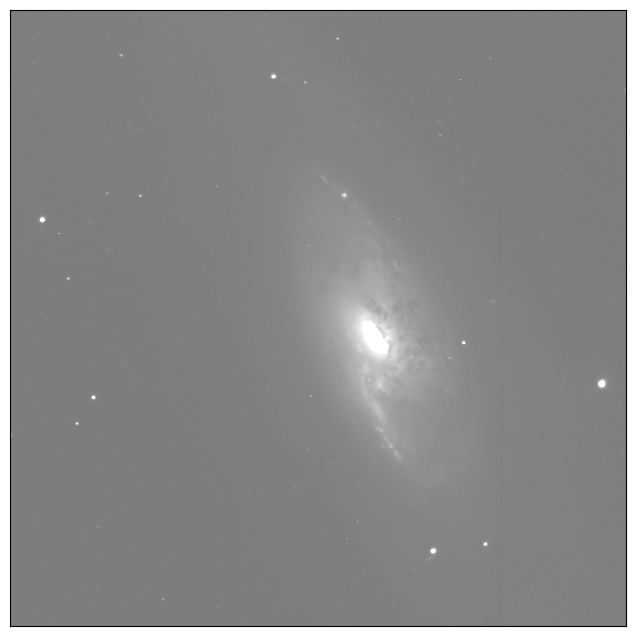

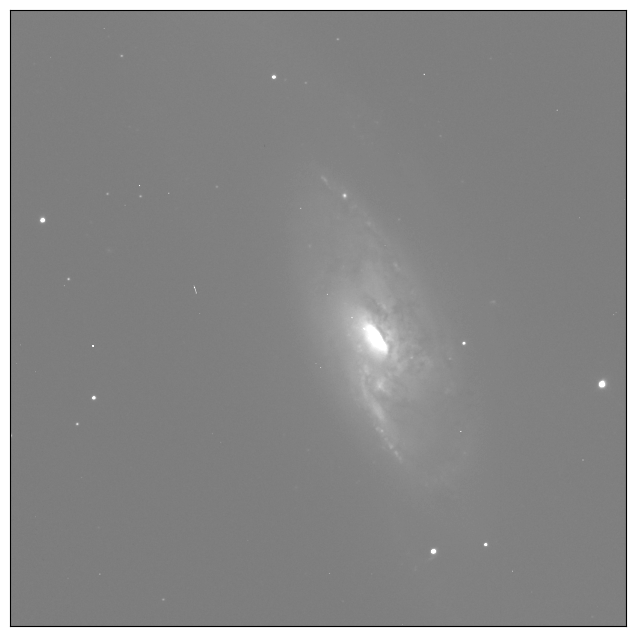

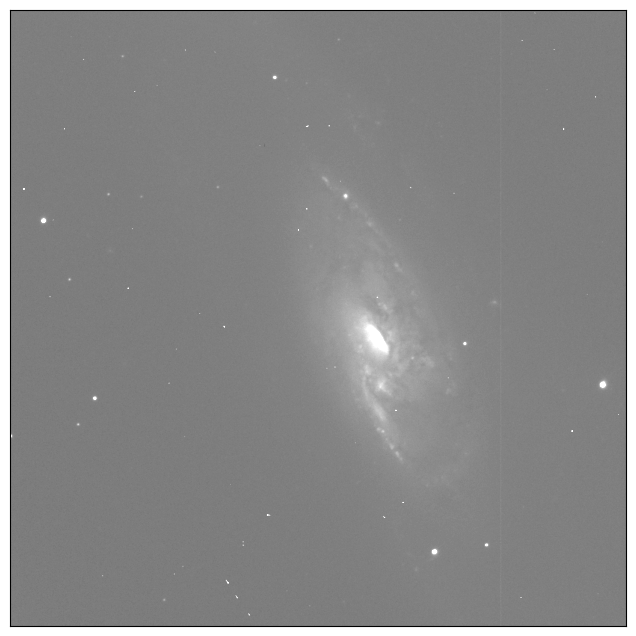

In [28]:
# show each processed image
show_image(r_proc)
show_image(v_proc)
show_image(b_proc)

## Step 6: Combine filtered images to make a 3-color image

You can combine image data taken with different filters to create a color image. The `imshow` function in `matplotlib` can be used to display such images. The key is that you must pass `imshow` a three dimensional array holding the image data for all 3 of the filters. That is, `imshow` expects a `numpy` array with a shape of (M, N, 3), where M is the number of rows, N is the number of columns, and there are 3 different images all stacked together in the array (note the dimension order differs from the `datacube` we discussed in class). Before you add each individual image to the 3D array, you must scale the pixel values to integers between 0 and 255 (these are known as 8-bit unsigned integers or `uint8` in `numpy` jargon). You can accomplish this mapping using the function below.

In [29]:
def get_8bit(image, cmin, cmax):
    """
    return a 2D numpy array with the values of the input image mapped to the range 0-255.
    
    image: a 2D numpy array.
    cmin:  values of cmin or less will be mapped to 0 in the output
    cmax:  values of cmax or greater will be mapped to 255 in the output
    
    image values between cmin and cmax are linearly mapped to values in the range 0-255
    """
    
    scaledim = 255 * (image - cmin) / (cmax - cmin) 
    scaledim[scaledim < 0] = 0
    scaledim[scaledim > 255] = 255
    
    return scaledim.astype(np.uint8) 

For each of your processed images, you will need determine how best to set the `cmin` and `cmax` values (as defined in the function above) to produce nice looking output images (think of the `vmin` and `vmax` options in `imshow`). For each of your 3 processed images, start by determining the typical **background** value on the image; that is the typical value of pixels that do not contain star or galaxy light. You can use the `sigma_clip` function from `astropy.stats` to get a sample of these pixel values. Determine the mean and standard deviation ($\sigma$) of this sample, and then start by setting `cmin` to be one $\sigma$ less than the mean and `cmax` to be, say, $6\sigma$ above the mean. Adjust these choices as needed for your desired result.

In [35]:
# determine the cmin and cmax values for each image
# Apply sigma clipping to get background pixel values
clipped_r = sigma_clip(r_proc, sigma=30)
clipped_v = sigma_clip(v_proc, sigma=30)
clipped_b = sigma_clip(b_proc, sigma=30)

# Compute mean and standard deviation for background
mean_r, std_r = np.mean(clipped_r), np.std(clipped_r)
mean_v, std_v = np.mean(clipped_v), np.std(clipped_v)
mean_b, std_b = np.mean(clipped_b), np.std(clipped_b)

# Set cmin and cmax values
cmin_r, cmax_r = mean_r - std_r, mean_r + 6 * std_r
cmin_v, cmax_v = mean_v - std_v, mean_v + 6 * std_v
cmin_b, cmax_b = mean_b - std_b, mean_b + 6 * std_b

**Optional:** "Register" the images so that stars have the same pixel coordinates on all three images. The telescope guiding is imperfect, so you may notice that the stars move slightly across the field from the first exposure to the last. To correct for this, *roughly* determine the pixel coordinates of a star in each of the 3 images and apply a shift to two of the images to register them to the third image. Simple linear shifts can be applied approximately using [`np.roll`](https://numpy.org/doc/stable/reference/generated/numpy.roll.html) or more precisely using [`scipy.ndimage.shift`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.shift.html#scipy.ndimage.shift).

In [ ]:
# [optional] register the images


Now combine the 3 scaled images to make a new, 3D array with a shape of (ny, nx, 3). Note if you want the colors to be close to what your eye would see, the order matters! The `imshow` function will show the first (0th) image as red, the second image as green, and the third image as blue. For each pixel the red, green, and blue (or "RGB") values will determine the color of each pixel in the output. Recall that the R-band filter in astronomy is close to what you eye considers red light, the V-band filter is close to what your eye considers green, and the B-band is close to blue.

In [36]:
# combine the 3 processed images into a single 3D array
ny, nx = r_proc.shape
im = np.zeros( (ny, nx, 3), dtype='uint8')
im[:, :, 0] = get_8bit(r_proc, cmin_r, cmax_r) # red image
im[:, :, 1] = get_8bit(v_proc, cmin_v, cmax_v) # green image
im[:, :, 2] = get_8bit(b_proc, cmin_b, cmax_b) # blue image

(1024, 1024, 3)


<Figure size 1000x1000 with 0 Axes>

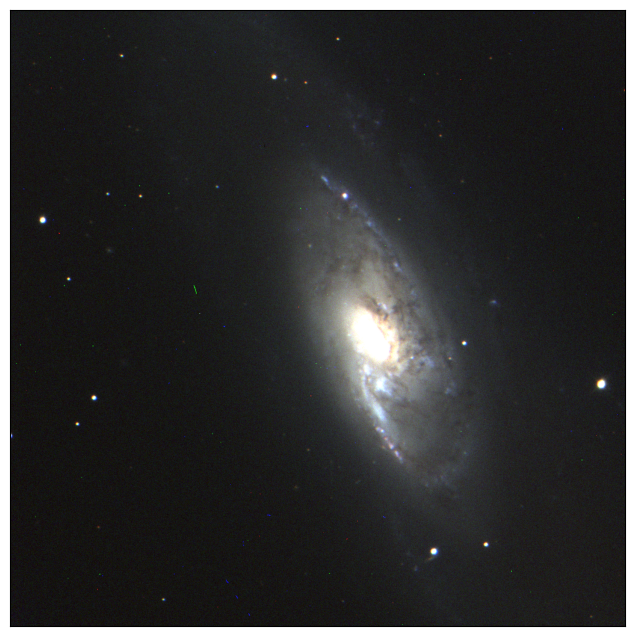

In [37]:
# show the final, 3 color image
plt.figure(figsize=(10,10))
bad_col = [815,816]
im_clean = np.delete(im, bad_col, axis=1)
show_image(im_clean)
print(im.shape)
#plt.savefig('B_M106.pdf')

## Step 7: Write a report on processing CCD images and show your results

Present your results in a formal report. I highly recommend using $\LaTeX$ as this will be a requirement in future assignments. [Overleaf](https://www.overleaf.com/) is a good way to get started in $\LaTeX$. Be sure to include figures, equations, and cite references as appropriate.

The report should demonstrate your understanding of how raw CCD data are calibrated to produce images with pixel values proportional to the number of photons incident at the top of the telescope aperture. Be sure to provide evidence that your image processing has achieved this desired goal.

**Do not** reproduce your python code in the report! Rather, you should explain in words (and occasionally mathematical equations) what you have done and, most importantly, **why** you do what you do. Provide figures that strengthen your presentation.

Your target audience are fellow astronomy students at your level who have not yet taken ASTR 350. You should provide sufficient details in what you did so that an untrained student could understand and reproduce your results using your report as reference.

## All Done?

Submit using `git`. 